In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math as mt

In [2]:
meteo = pd.read_csv("meteo-vid-2018.csv", engine = "python")
flujo = pd.read_csv("flujos-vid-2018.csv", skiprows = [1], engine = "python")
meteo["Date"] = pd.to_datetime(meteo.Date, dayfirst = True)
meteo["Year"] = meteo["Date"].dt.year
meteo["Month"] = meteo["Date"].dt.month
meteo["Day"] = meteo["Date"].dt.day

In [3]:
meteo.tail(10)

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,Year,Month,Day
18253,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18254,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18255,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18256,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18257,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18258,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18259,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18260,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18261,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
meteo.columns

Index([u'Date', u'Time', u'batt_volt_Min', u'logger_temp', u'short_up_Avg',
       u'short_dn_Avg', u'long_up_Avg', u'long_dn_Avg', u'cnr4_T_C_Avg',
       u'cnr4_T_K_Avg', u'long_up_corr_Avg', u'long_dn_corr_Avg',
       u'Rs_net_Avg', u'Rl_net_Avg', u'albedo_Avg', u'Rn_Avg', u'AirTC_Avg',
       u'RH', u'WS_ms_S_WVT', u'WindDir_D1_WVT', u'WindDir_SD1_WVT',
       u'Temp_C_Avg(1)', u'Temp_C_Avg(2)', u'Temp_C_Avg(3)', u'Temp_C_Avg(4)',
       u'H. suelo 60', u'Result2_Avg', u'T. suelo 60 cm', u'Result4_Avg',
       u'Result5_Avg', u'Result6_Avg', u'Result7_Avg', u'Result8_Avg',
       u'Result9_Avg', u'Riego', u'Year', u'Month', u'Day'],
      dtype='object')

In [5]:
#missing_values_count[0:36]

In [6]:
M = []
for m in range(17245,18263):
    M.append(m)

In [7]:
M[1017]

18262

In [8]:
meteo = meteo.drop(M,0)

In [9]:
meteo.tail()

,Date,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,...,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,Year,Month,Day
17240,2018-12-31,21:00:00,11.92,10.57,-2.19,1.69,-59.02,-12.61,9.76,282.91,...,63.51,0.04,14.27,12.94,14.34,14.47,0.0,2018.0,12.0,31.0
17241,2018-12-31,21:30:00,11.87,9.57,-1.79,1.90,-55.47,-10.63,8.69,281.84,...,63.50,0.04,14.27,12.94,14.35,14.47,0.0,2018.0,12.0,31.0
17242,2018-12-31,22:00:00,11.81,8.92,-1.93,2.09,-55.19,-10.33,8.78,281.93,...,63.50,0.04,14.27,12.94,14.35,14.47,0.0,2018.0,12.0,31.0
17243,2018-12-31,22:30:00,11.76,8.59,-2.00,2.03,-54.21,-9.00,8.38,281.53,...,63.50,0.04,14.27,12.93,14.35,14.46,0.0,2018.0,12.0,31.0
17244,2018-12-31,23:00:00,11.71,8.21,-2.11,1.79,-54.44,-10.41,8.28,281.43,...,63.50,0.04,14.27,12.93,14.35,14.46,0.0,2018.0,12.0,31.0


*_Parte 1_*

In [10]:
    #Creando un DataFrame con los datos más limpios y no manejar tantos datos innecesarios
meteo1 = pd.DataFrame()
meteo1["Date"] = meteo["Date"]
meteo1["Time"] = meteo["Time"]
meteo1["Year"] = meteo["Year"]
meteo1["Month"] = meteo["Month"]
meteo1["Day"] = meteo["Day"]
meteo1["VelWind"] = meteo["WS_ms_S_WVT"]
meteo1["Temp"] = meteo["AirTC_Avg"]
meteo1["RH"] = meteo["RH"]
meteo1["Rs"] = meteo["Rn_Avg"]
meteo1["Albedo"] = meteo["albedo_Avg"]
meteo1.head()

,Date,Time,Year,Month,Day,VelWind,Temp,RH,Rs,Albedo
0,2018-01-06,17:00:00,2018.0,1.0,6.0,2.33,27.75,20.61,1.79,0.00
1,2018-01-06,17:30:00,2018.0,1.0,6.0,3.12,26.57,25.25,-18.59,0.00
2,2018-01-06,18:00:00,2018.0,1.0,6.0,2.54,25.01,26.45,-35.10,0.00
3,2018-01-06,18:30:00,2018.0,1.0,6.0,2.01,23.65,29.22,-40.13,-0.16
4,2018-01-06,19:00:00,2018.0,1.0,6.0,2.14,22.84,31.08,-39.46,-0.15


In [11]:
#for m in range(0,len(meteo1)):
#    print meteo1["Albedo"][m] 

In [12]:
meteo1.dtypes

Date       datetime64[ns]
Time               object
Year              float64
Month             float64
Day               float64
VelWind           float64
Temp              float64
RH                float64
Rs                float64
Albedo             object
dtype: object

In [13]:
    #Poniendo todo en formato float64
meteo2 = pd.DataFrame()
Date0 = meteo1["Date"]
Date1 = meteo1["Time"]
meteo2[meteo1.columns] = meteo1[meteo1.columns].apply(pd.to_numeric, errors = "coerce")
meteo2["Date"] = Date0
meteo2["Time"] = Date1
meteo2.dtypes

Date       datetime64[ns]
Time               object
Year              float64
Month             float64
Day               float64
VelWind           float64
Temp              float64
RH                float64
Rs                float64
Albedo            float64
dtype: object

In [14]:
    #Sacando los promedios mensuales de la velocidad del viento y de la radiaación solar
meteo2["VelWindMean"] = (meteo2.groupby(["Year", "Month"])["VelWind"].transform(np.mean))
meteo2["RsMean"]     = (meteo2.groupby(["Year", "Month"])["Rs"].transform(np.mean))
meteo2["AlbedoMean"] = (meteo2.groupby(["Year", "Month"])["Albedo"].transform(np.mean))
    #Sacando la temperatura máxima y mínima
meteo2["Tmax"] = (meteo2.groupby(["Year", "Month"])["Temp"].transform(np.max))
meteo2["Tmin"] = (meteo2.groupby(["Year", "Month"])["Temp"].transform(np.min))
    #Sacando el RH máximo y mínimo
meteo2["RHmax"] = (meteo2.groupby(["Year", "Month"])["RH"].transform(np.max))
meteo2["RHmin"] = (meteo2.groupby(["Year", "Month"])["RH"].transform(np.min))


In [15]:
meteo2.head(2)

,Date,Time,Year,Month,Day,VelWind,Temp,RH,Rs,Albedo,VelWindMean,RsMean,AlbedoMean,Tmax,Tmin,RHmax,RHmin
0,2018-01-06,17:00:00,2018.0,1.0,6.0,2.33,27.75,20.61,1.79,0.0,1.944333,34.802554,-0.423611,33.35,0.54,91.6,5.98
1,2018-01-06,17:30:00,2018.0,1.0,6.0,3.12,26.57,25.25,-18.59,0.0,1.944333,34.802554,-0.423611,33.35,0.54,91.6,5.98


In [16]:
    #Como ahroa se quiere trabajar con datos mensuales que ya se tienen
#los datso diarios no son necesarios
meteo3 = meteo2.drop_duplicates(subset = ["Year", "Month"])
meteo3 = meteo3.reset_index(drop=True)
meteo3
#meteo2 = meteo1.drop_duplicates(subset=[ "Month", "Year", "Day"])
#meteo2 = meteo2.reset_index(drop=True)
#meteo2.tail()

,Date,Time,Year,Month,Day,VelWind,Temp,RH,Rs,Albedo,VelWindMean,RsMean,AlbedoMean,Tmax,Tmin,RHmax,RHmin
0,2018-01-06,17:00:00,2018.0,1.0,6.0,2.33,27.75,20.61,1.79,0.00,1.944333,34.802554,-0.423611,33.35,0.54,91.60,5.98
1,2018-02-01,00:00:00,2018.0,2.0,1.0,2.18,12.15,51.79,-58.85,-0.51,1.964189,56.250350,-0.479545,31.47,0.07,99.53,6.76
2,2018-03-01,00:00:00,2018.0,3.0,1.0,1.44,9.88,61.63,-67.72,-0.55,1.926196,92.894913,-0.409137,35.22,3.06,89.73,6.76
3,2018-04-01,00:00:00,2018.0,4.0,1.0,1.11,13.00,53.70,-60.21,-0.77,2.101812,134.012965,-0.386088,36.30,5.43,93.40,5.23
4,2018-05-01,00:00:00,2018.0,5.0,1.0,1.62,16.45,64.43,-74.48,-0.72,2.113918,162.405343,-0.367835,38.18,7.13,94.60,8.19
5,2018-06-01,00:00:00,2018.0,6.0,1.0,1.58,18.98,54.48,-48.49,-1.94,2.154986,163.926069,-0.381934,41.47,13.12,98.37,5.34
6,2018-07-01,00:00:00,2018.0,7.0,1.0,0.43,21.22,81.30,-53.37,-1.10,2.022204,157.534402,-0.189610,44.94,18.71,97.00,13.10
7,2018-08-01,00:00:00,2018.0,8.0,1.0,0.40,27.14,81.63,-34.15,-1.71,1.910853,151.273589,-0.381667,40.24,22.71,98.60,30.16
8,2018-09-01,00:00:00,2018.0,9.0,1.0,1.02,27.61,84.23,-33.48,-1.53,1.790326,136.749910,-0.486379,41.39,19.43,98.03,21.32
9,2018-10-01,00:00:00,2018.0,10.0,1.0,0.77,26.75,82.20,-18.32,-2.51,1.664435,95.513468,-0.614787,35.82,10.23,98.47,17.32


In [17]:
meteo3

,Date,Time,Year,Month,Day,VelWind,Temp,RH,Rs,Albedo,VelWindMean,RsMean,AlbedoMean,Tmax,Tmin,RHmax,RHmin
0,2018-01-06,17:00:00,2018.0,1.0,6.0,2.33,27.75,20.61,1.79,0.00,1.944333,34.802554,-0.423611,33.35,0.54,91.60,5.98
1,2018-02-01,00:00:00,2018.0,2.0,1.0,2.18,12.15,51.79,-58.85,-0.51,1.964189,56.250350,-0.479545,31.47,0.07,99.53,6.76
2,2018-03-01,00:00:00,2018.0,3.0,1.0,1.44,9.88,61.63,-67.72,-0.55,1.926196,92.894913,-0.409137,35.22,3.06,89.73,6.76
3,2018-04-01,00:00:00,2018.0,4.0,1.0,1.11,13.00,53.70,-60.21,-0.77,2.101812,134.012965,-0.386088,36.30,5.43,93.40,5.23
4,2018-05-01,00:00:00,2018.0,5.0,1.0,1.62,16.45,64.43,-74.48,-0.72,2.113918,162.405343,-0.367835,38.18,7.13,94.60,8.19
5,2018-06-01,00:00:00,2018.0,6.0,1.0,1.58,18.98,54.48,-48.49,-1.94,2.154986,163.926069,-0.381934,41.47,13.12,98.37,5.34
6,2018-07-01,00:00:00,2018.0,7.0,1.0,0.43,21.22,81.30,-53.37,-1.10,2.022204,157.534402,-0.189610,44.94,18.71,97.00,13.10
7,2018-08-01,00:00:00,2018.0,8.0,1.0,0.40,27.14,81.63,-34.15,-1.71,1.910853,151.273589,-0.381667,40.24,22.71,98.60,30.16
8,2018-09-01,00:00:00,2018.0,9.0,1.0,1.02,27.61,84.23,-33.48,-1.53,1.790326,136.749910,-0.486379,41.39,19.43,98.03,21.32
9,2018-10-01,00:00:00,2018.0,10.0,1.0,0.77,26.75,82.20,-18.32,-2.51,1.664435,95.513468,-0.614787,35.82,10.23,98.47,17.32


In [18]:
meteo3["TMean"] = 0
meteo3["RHMean"] = 0

In [19]:
for m in range(0, len(meteo3)):
    meteo3["TMean"][m] = (meteo3["Tmax"][m] + meteo3["Tmin"][m])/2
    meteo3["RHMean"][m] = (meteo3["RHmax"][m] + meteo3["RHmin"][m])/2

/home/joel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/joel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
(meteo3["Tmax"][0] + meteo3["Tmin"][0])/2

16.945

In [21]:
meteo3

,Date,Time,Year,Month,Day,VelWind,Temp,RH,Rs,Albedo,VelWindMean,RsMean,AlbedoMean,Tmax,Tmin,RHmax,RHmin,TMean,RHMean
0,2018-01-06,17:00:00,2018.0,1.0,6.0,2.33,27.75,20.61,1.79,0.00,1.944333,34.802554,-0.423611,33.35,0.54,91.60,5.98,16,48
1,2018-02-01,00:00:00,2018.0,2.0,1.0,2.18,12.15,51.79,-58.85,-0.51,1.964189,56.250350,-0.479545,31.47,0.07,99.53,6.76,15,53
2,2018-03-01,00:00:00,2018.0,3.0,1.0,1.44,9.88,61.63,-67.72,-0.55,1.926196,92.894913,-0.409137,35.22,3.06,89.73,6.76,19,48
3,2018-04-01,00:00:00,2018.0,4.0,1.0,1.11,13.00,53.70,-60.21,-0.77,2.101812,134.012965,-0.386088,36.30,5.43,93.40,5.23,20,49
4,2018-05-01,00:00:00,2018.0,5.0,1.0,1.62,16.45,64.43,-74.48,-0.72,2.113918,162.405343,-0.367835,38.18,7.13,94.60,8.19,22,51
5,2018-06-01,00:00:00,2018.0,6.0,1.0,1.58,18.98,54.48,-48.49,-1.94,2.154986,163.926069,-0.381934,41.47,13.12,98.37,5.34,27,51
6,2018-07-01,00:00:00,2018.0,7.0,1.0,0.43,21.22,81.30,-53.37,-1.10,2.022204,157.534402,-0.189610,44.94,18.71,97.00,13.10,31,55
7,2018-08-01,00:00:00,2018.0,8.0,1.0,0.40,27.14,81.63,-34.15,-1.71,1.910853,151.273589,-0.381667,40.24,22.71,98.60,30.16,31,64
8,2018-09-01,00:00:00,2018.0,9.0,1.0,1.02,27.61,84.23,-33.48,-1.53,1.790326,136.749910,-0.486379,41.39,19.43,98.03,21.32,30,59
9,2018-10-01,00:00:00,2018.0,10.0,1.0,0.77,26.75,82.20,-18.32,-2.51,1.664435,95.513468,-0.614787,35.82,10.23,98.47,17.32,23,57


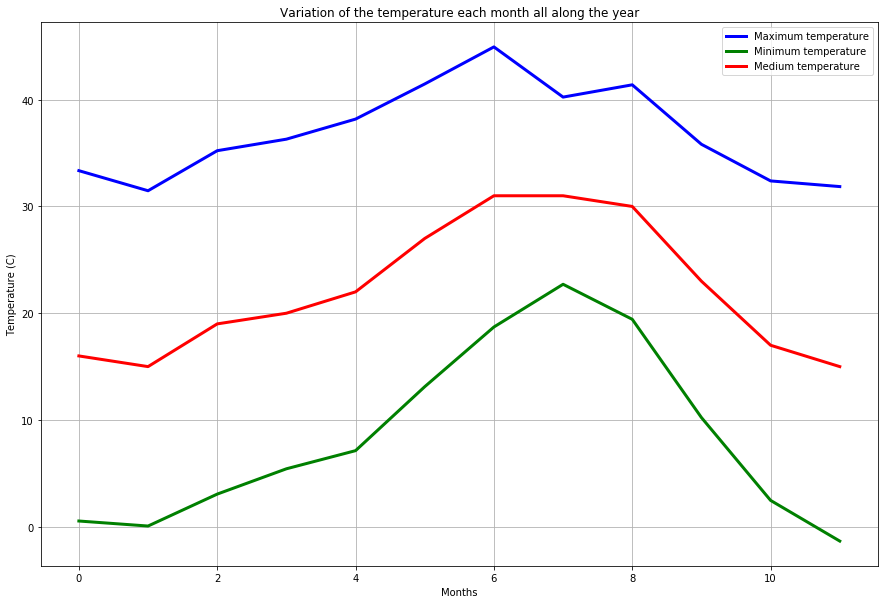

In [22]:
    #Creando una gráfica con la variación de la temperatura máxima,
#mínima y promedio
plt.figure(figsize=(15,10))
plt.plot(meteo3["Tmax"], linewidth = 3, label="Maximum temperature", color = "b")
plt.plot(meteo3["Tmin"], linewidth = 3, label = "Minimum temperature", color = "g")
plt.plot(meteo3["TMean"], linewidth = 3, label = "Medium temperature ", color = "r")

plt.xlabel("Months")
plt.ylabel("Temperature (C)")

plt.grid()
plt.legend()

plt.title("Variation of the temperature each month all along the year")
plt.savefig("grafica_1",plt=2000)
plt.show()

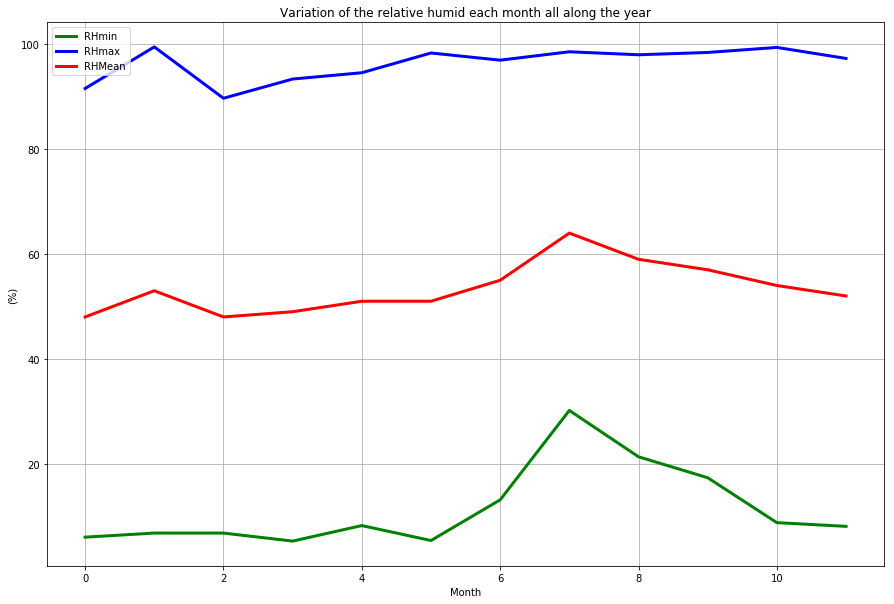

In [23]:
    #Gráfica de la variación de la humedad relativa máxima,
#mínima y media cada mes a lo largo del año
plt.figure(figsize = (15,10))
plt.plot(meteo3["RHmin"],  linewidth = 3, label = "RHmin", color = "g")
plt.plot(meteo3["RHmax"],  linewidth = 3, label = "RHmax", color = "b")
plt.plot(meteo3["RHMean"], linewidth = 3, label = "RHMean", color = "r")

plt.xlabel("Month")
plt.ylabel("(%)")

plt.grid()
plt.legend()

plt.title("Variation of the relative humid each month all along the year")
plt.savefig("grafica_2", plt= 2000)
plt.show()

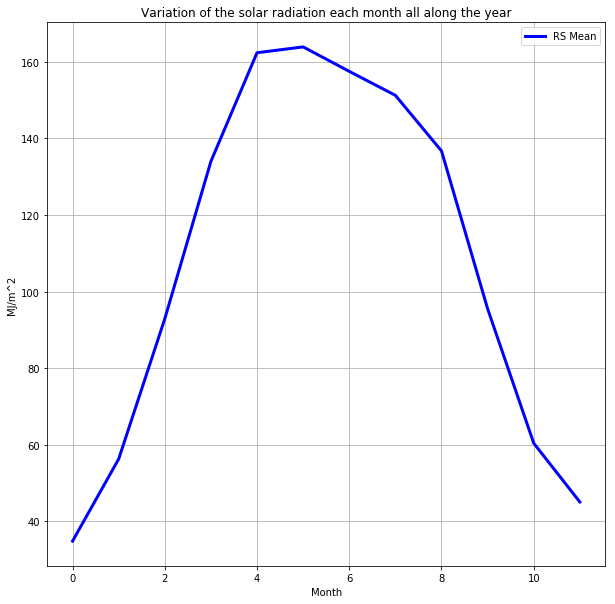

In [24]:
        #Gráfica de la variación de la radiación solar máxima, 
#mínima y promedio
plt.figure(figsize = (10,10))
plt.plot(meteo3["RsMean"], linewidth = 3, label = "RS Mean", color = "b")

plt.xlabel("Month")
plt.ylabel("MJ/m^2")

plt.grid()
plt.legend()

plt.title("Variation of the solar radiation each month all along the year")
plt.savefig("grafica_3", plt = 2000)
plt.show()

*Parte 2*

Estimación de la evapotranspiración *ET_0* mensual promedio

In [25]:
EvapoTrans = pd.DataFrame()

In [26]:
    #Haciendo uso de la ecuación 7 de Jensen & Haise y Valiantzas
# ET_0 = (0.0252 T + 0.078)Rs
# ET_0 = 0.0393*Rs*(TMean + 9.5)^(0.5)-0.19*RS^(0.6)*(eso)^(0.15)
#         + 0.0061*(Tmean + 20)*(1.12*Tmean - Tmin - 2)^(0.7)
EvapoTrans["Janse & Haise"] = (0,0,0,0,0,0,0,0,0,0,0,0)
EvapoTrans["Valiantzas 1"] = (0,0,0,0,0,0,0,0,0,0,0,0)
EvapoTrans["Valiantzas 4"] = (0,0,0,0,0,0,0,0,0,0,0,0)
EvapoTrans

,Janse & Haise,Valiantzas 1,Valiantzas 4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [27]:
    #Obteniendo "eso"
#eso = latitud en radianes
eso = (28.9186*mt.pi)/180
eso

0.5047247850672322

In [28]:
dr = 1 + 0.003*mt.cos(2*mt.pi/365)
roh = 0.409*mt.sin(2*mt.pi/465 - 1.39)
Ws = mt.acos(-mt.tan(eso*mt.tan(roh)))
Ra = (24*60/mt.pi)*0.082*dr*(Ws*mt.sin(eso)*mt.sin(roh) + mt.cos(eso)*mt.cos(roh)*mt.sin(Ws))


In [29]:
meteo3.dtypes

Date           datetime64[ns]
Time                   object
Year                  float64
Month                 float64
Day                   float64
VelWind               float64
Temp                  float64
RH                    float64
Rs                    float64
Albedo                float64
VelWindMean           float64
RsMean                float64
AlbedoMean            float64
Tmax                  float64
Tmin                  float64
RHmax                 float64
RHmin                 float64
TMean                   int64
RHMean                  int64
dtype: object

In [30]:
for m in range(0,len(meteo3)):
    EvapoTrans["Janse & Haise"][m] = (0.0252*meteo3["TMean"][m] + 0.078)*meteo3["RsMean"][m]
    EvapoTrans["Valiantzas 1"][m] = (0.0393*meteo3["RsMean"][m]*(meteo3["TMean"][m] + 9.5)**(0.5)-0.19*meteo3["RsMean"][m]**(0.6)*(eso)**(0.15)+ 0.0061*(meteo3["TMean"][m] + 20)*(1.12*meteo3["TMean"][m] - meteo3["Tmin"][m] - 2)**(0.7))
    EvapoTrans["Valiantzas 4"][m] = 0.051*(1-meteo3["Albedo"][m])*meteo3["RsMean"][m]*(meteo3["TMean"][m] + 9.5)**(0.5)-2.4*(meteo3["RsMean"][m]/Ra)**2 + 0.048*(meteo3["TMean"][m]+20)*(1-meteo3["RHMean"][m]/100)*(0.5+0.536*meteo3["VelWindMean"][m])+0.00012*101

In [31]:
EvapoTrans

,Janse & Haise,Valiantzas 1,Valiantzas 4
0,16,6,4
1,25,10,5
2,51,18,-9
3,77,26,-38
4,102,33,-74
5,124,37,-8
6,135,37,-37
7,129,35,0
8,114,32,2
9,62,20,45


In [32]:
flujo.columns

Index([u'Year', u'DoY', u'Hour', u'NEE', u'LE', u'H', u'Rg', u'Tair', u'Tsoil',
       u'rH', u'VPD', u'Ustar', u'Ustar_Thres', u'Ustar_fqc', u'NEE_orig',
       u'NEE_f', u'NEE_fqc', u'NEE_fall', u'NEE_fall_qc', u'NEE_fnum',
       u'NEE_fsd', u'NEE_fmeth', u'NEE_fwin', u'LE_orig', u'LE_f', u'LE_fqc',
       u'LE_fall', u'LE_fall_qc', u'LE_fnum', u'LE_fsd', u'LE_fmeth',
       u'LE_fwin', u'H_orig', u'H_f', u'H_fqc', u'H_fall', u'H_fall_qc',
       u'H_fnum', u'H_fsd', u'H_fmeth', u'H_fwin', u'Rg_orig', u'Rg_f',
       u'Rg_fqc', u'Rg_fall', u'Rg_fall_qc', u'Rg_fnum', u'Rg_fsd',
       u'Rg_fmeth', u'Rg_fwin', u'VPD_orig', u'VPD_f', u'VPD_fqc', u'VPD_fall',
       u'VPD_fall_qc', u'VPD_fnum', u'VPD_fsd', u'VPD_fmeth', u'VPD_fwin',
       u'rH_orig', u'rH_f', u'rH_fqc', u'rH_fall', u'rH_fall_qc', u'rH_fnum',
       u'rH_fsd', u'rH_fmeth', u'rH_fwin', u'Tair_orig', u'Tair_f',
       u'Tair_fqc', u'Tair_fall', u'Tair_fall_qc', u'Tair_fnum', u'Tair_fsd',
       u'Tair_fmeth', u'Tair_fwin'

In [33]:
flujo

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0.00000,-9999.00,16.51,207.66,0.92767,1.00713,-1.0729,1
1,2018,7,1.0,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0.00000,-9999.00,16.61,207.66,0.92767,1.01249,-0.9620,1
2,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0.00000,-9999.00,16.07,207.66,0.92767,0.98371,-1.1643,1
3,2018,7,2.0,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0.00000,-9999.00,16.06,207.66,0.92767,0.98318,-1.1648,1
4,2018,7,2.5,0.31,6.40,-0.55,-1.32,15.81,21.10,47.76,...,-9999,-9999,0.00000,-9999.00,15.81,207.66,0.92767,0.96997,-1.4929,1
5,2018,7,3.0,0.68,2.44,-2.92,-1.22,15.03,21.10,48.66,...,-9999,-9999,0.00000,-9999.00,15.03,207.66,0.92767,0.92923,-0.5480,1
6,2018,7,3.5,0.36,2.40,-2.61,-1.14,14.70,21.10,49.62,...,-9999,-9999,0.00000,-9999.00,14.70,207.66,0.92767,0.91221,-0.2850,1
7,2018,7,4.0,0.10,2.49,-1.29,-1.74,14.42,21.10,49.73,...,-9999,-9999,0.00000,-9999.00,14.42,207.66,0.92767,0.89787,0.2680,1
8,2018,7,4.5,0.96,5.80,-8.07,-1.24,14.76,21.10,48.00,...,-9999,-9999,0.00000,-9999.00,14.76,207.66,0.92767,0.91529,-0.2270,1
9,2018,7,5.0,-0.07,2.39,3.08,-1.31,15.30,21.10,47.16,...,-9999,-9999,0.00000,-9999.00,15.30,207.66,0.92767,0.94325,-0.4400,1


In [34]:
Dat = (np.asarray(flujo["Year"]-1970, dtype="datetime64[Y]"))+(np.asarray(flujo["DoY"], dtype="timedelta64[D]")-1)
flujo["Date"] = Dat

In [35]:
    #Para usar solamente los datos que se requiere
Flujo1 = pd.DataFrame()
Flujo1["Date"] = flujo["Date"]
Flujo1["Date"] = pd.to_datetime(Flujo1["Date"])
Flujo1["Year"] = Flujo1["Date"].dt.year
Flujo1["Month"] = Flujo1["Date"].dt.month
Flujo1["Day"] = Flujo1["Date"].dt.day
Flujo1["Hour"] = flujo["Hour"]
Flujo1["RnG"] = flujo["Rg_f"]
Flujo1["ET"] = flujo["LE_f"]
Flujo1["H"] = flujo["H_f"]

Flujo1.head()

,Date,Year,Month,Day,Hour,RnG,ET,H
0,2018-01-07,2018,1,7,0.5,-0.87,11.52,-20.04
1,2018-01-07,2018,1,7,1.0,-0.97,15.11,-7.34
2,2018-01-07,2018,1,7,1.5,-0.96,8.61,-9.76
3,2018-01-07,2018,1,7,2.0,-2.06,1.93,-8.55
4,2018-01-07,2018,1,7,2.5,-1.32,6.40,-0.55


In [40]:
Flujo2 = Flujo1[Flujo1["Month"] == 5]

In [41]:
Flujo2["RnGMean"] = Flujo2.groupby(["Hour"])["RnG"].transform("mean")
Flujo2["ETMean"]  = Flujo2.groupby(["Hour"])["ET"].transform("mean")
Flujo2["HMean"]   = Flujo2.groupby(["Hour"])["H"].transform("mean")
Flujo2 = Flujo2.drop_duplicates(["Hour"]).reset_index(drop=True)
Flujo2.head()

,Date,Year,Month,Day,Hour,RnG,ET,H,ETMean,RnGMean,HMean
0,2018-05-01,2018,5,1,0.5,-3.22,7.44,-28.68,4.534516,-2.166129,-7.689677
1,2018-05-01,2018,5,1,1.0,-4.48,3.18,-27.14,2.993548,-2.274516,-7.237742
2,2018-05-01,2018,5,1,1.5,-3.75,4.90,-21.34,2.611290,-2.196129,-6.650968
3,2018-05-01,2018,5,1,2.0,-3.51,8.96,-33.26,3.404839,-2.234516,-5.064194
4,2018-05-01,2018,5,1,2.5,-3.37,4.59,-13.29,2.756774,-2.210000,-5.596452


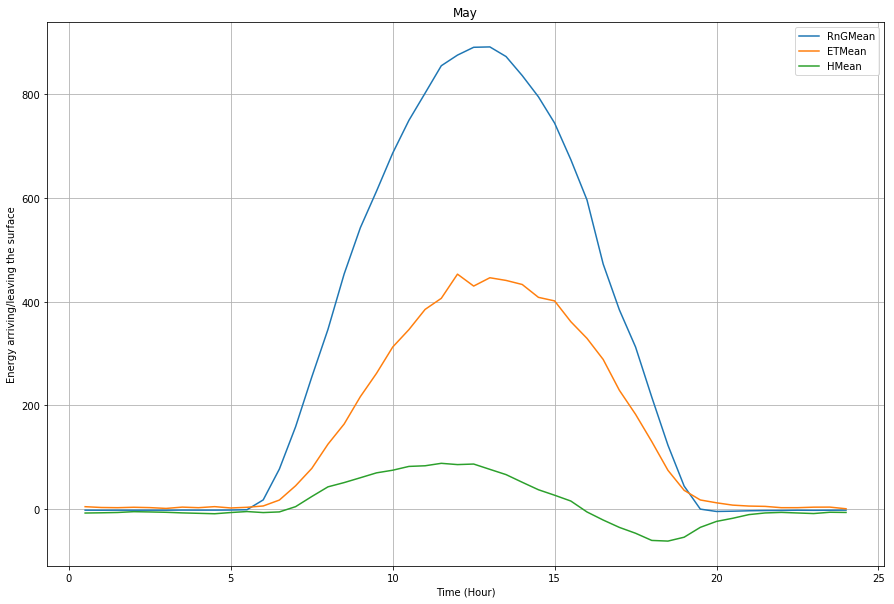

In [43]:
plt.figure(figsize=(15,10))
plt.plot(Flujo2.Hour, Flujo2.RnGMean)
plt.plot(Flujo2.Hour, Flujo2.ETMean)
plt.plot(Flujo2.Hour, Flujo2.HMean)
plt.xlabel("Time (Hour)")
plt.ylabel("Energy arriving/leaving the surface")

plt.grid()
plt.legend()

plt.title("May")
plt.savefig("grafica_4", plt =2000)
plt.show()